# 911 Calls Capstone Project

In [1]:
#911 call data of Montgomery county, PA was downloaded from Kaggle

In [2]:
#import python libraries:

import numpy as np

import pandas as pd

In [3]:
#import visualization libraries and set %matplotlib inline:

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#Read the 911 csv file as a dataframe called df

df = pd.read_csv("C:\\Users\\emman\\911 calls Montgomery county.csv")

In [5]:
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
...,...,...,...,...,...,...,...,...,...
663517,40.157956,-75.348060,SUNSET AVE & WOODLAND AVE; EAST NORRITON; 2020...,19403.0,Traffic: VEHICLE ACCIDENT -,2020-07-29 15:46:51,EAST NORRITON,SUNSET AVE & WOODLAND AVE,1
663518,40.136306,-75.428697,EAGLEVILLE RD & BUNTING CIR; LOWER PROVIDENCE...,19403.0,EMS: GENERAL WEAKNESS,2020-07-29 15:52:19,LOWER PROVIDENCE,EAGLEVILLE RD & BUNTING CIR,1
663519,40.013779,-75.300835,HAVERFORD STATION RD; LOWER MERION; Station 3...,19041.0,EMS: VEHICLE ACCIDENT,2020-07-29 15:52:52,LOWER MERION,HAVERFORD STATION RD,1
663520,40.121603,-75.351437,MARSHALL ST & HAWS AVE; NORRISTOWN; 2020-07-29...,19401.0,Fire: BUILDING FIRE,2020-07-29 15:54:08,NORRISTOWN,MARSHALL ST & HAWS AVE,1


In [6]:
#check info() of the dataframe df 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [7]:
#check the head of df

df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [8]:
#what are the top 5 zipcodes for 911 calls?
#value_counts gives the number total number of unique zip. head(5) gives first five

df['zip'].value_counts().head(5)

19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: zip, dtype: int64

In [9]:
#what are the top 5 townships(twp) for 911 calls?

df['twp'].value_counts().head(5)

LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: twp, dtype: int64

In [10]:
#from title column, how many unique title codes are there?

df['title'].nunique()

148

In [11]:
#this is the same as the unique title question above.

len(df['title'].unique())

148

In [12]:
#create a new column called Reason from the title column using apply() method

df['Reason'] = df['title'].apply(lambda title : title.split(':')[0])

In [13]:
df['Reason']

0             EMS
1             EMS
2            Fire
3             EMS
4             EMS
           ...   
663517    Traffic
663518        EMS
663519        EMS
663520       Fire
663521    Traffic
Name: Reason, Length: 663522, dtype: object

In [14]:
# to practice for the above split(), index notation and lambda expression.
title = 'EMS: BACK PAINS/INJURY'

In [15]:
title.split(':')[0]

'EMS'

In [16]:
#calling the new dataframe df with column Reason

df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS
...,...,...,...,...,...,...,...,...,...,...
663517,40.157956,-75.348060,SUNSET AVE & WOODLAND AVE; EAST NORRITON; 2020...,19403.0,Traffic: VEHICLE ACCIDENT -,2020-07-29 15:46:51,EAST NORRITON,SUNSET AVE & WOODLAND AVE,1,Traffic
663518,40.136306,-75.428697,EAGLEVILLE RD & BUNTING CIR; LOWER PROVIDENCE...,19403.0,EMS: GENERAL WEAKNESS,2020-07-29 15:52:19,LOWER PROVIDENCE,EAGLEVILLE RD & BUNTING CIR,1,EMS
663519,40.013779,-75.300835,HAVERFORD STATION RD; LOWER MERION; Station 3...,19041.0,EMS: VEHICLE ACCIDENT,2020-07-29 15:52:52,LOWER MERION,HAVERFORD STATION RD,1,EMS
663520,40.121603,-75.351437,MARSHALL ST & HAWS AVE; NORRISTOWN; 2020-07-29...,19401.0,Fire: BUILDING FIRE,2020-07-29 15:54:08,NORRISTOWN,MARSHALL ST & HAWS AVE,1,Fire


In [17]:
#what is the most common Reason of 911 call based off the new column?

df['Reason'].value_counts()

EMS        332692
Traffic    230208
Fire       100622
Name: Reason, dtype: int64

<AxesSubplot:xlabel='Reason', ylabel='count'>

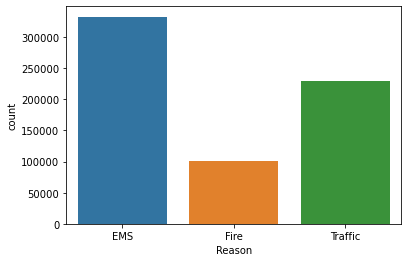

In [18]:
#Use Seaborn to create a countplot of 911 calls by Reason

sns.countplot(x='Reason',data=df)

In [19]:
#What is the data type of the objects in the timestamp column?

type(df['timeStamp'].iloc[0])

str

In [20]:
#use pd.to_datetime to convert timeStamp column from strings to DateTime objects.

df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [21]:
#to test if timeStamp column is now converted from strings to DateTime object

type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [22]:
#Grab one spcific attribute of the DataTime object by calling them.

time = df['timeStamp'].iloc[0]

In [23]:
time

Timestamp('2015-12-10 17:10:52')

In [24]:
#calling individual time periods:year,month,day,hour,minute,second etc. use time.tab to get options.

time.hour,time.month,time.day,time.second,time.minute,time.year

(17, 12, 10, 52, 10, 2015)

In [25]:
#to create the hour column with apply method:

df['Hour'] = df['timeStamp'].apply(lambda time2 : time2.hour)

#to create the month column with apply method:

df['Month'] = df['timeStamp'].apply(lambda time2 : time2.month)

#to create the day_of_week column with apply method:

df['Day of Week'] = df['timeStamp'].apply(lambda time2 : time2.dayofweek)

In [26]:
#new dataframe df

df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
663517,40.157956,-75.348060,SUNSET AVE & WOODLAND AVE; EAST NORRITON; 2020...,19403.0,Traffic: VEHICLE ACCIDENT -,2020-07-29 15:46:51,EAST NORRITON,SUNSET AVE & WOODLAND AVE,1,Traffic,15,7,2
663518,40.136306,-75.428697,EAGLEVILLE RD & BUNTING CIR; LOWER PROVIDENCE...,19403.0,EMS: GENERAL WEAKNESS,2020-07-29 15:52:19,LOWER PROVIDENCE,EAGLEVILLE RD & BUNTING CIR,1,EMS,15,7,2
663519,40.013779,-75.300835,HAVERFORD STATION RD; LOWER MERION; Station 3...,19041.0,EMS: VEHICLE ACCIDENT,2020-07-29 15:52:52,LOWER MERION,HAVERFORD STATION RD,1,EMS,15,7,2
663520,40.121603,-75.351437,MARSHALL ST & HAWS AVE; NORRISTOWN; 2020-07-29...,19401.0,Fire: BUILDING FIRE,2020-07-29 15:54:08,NORRISTOWN,MARSHALL ST & HAWS AVE,1,Fire,15,7,2


In [27]:
#Since the day of week is integer an 0-6,use .map() in the dictionary below to the map actual name to day of week.

dmap = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}

In [28]:
#call the map() with column df[Day of week]

df['Day of Week'] = df['Day of Week'].map(dmap)

In [29]:
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thursday
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thursday
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thursday
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thursday
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
663517,40.157956,-75.348060,SUNSET AVE & WOODLAND AVE; EAST NORRITON; 2020...,19403.0,Traffic: VEHICLE ACCIDENT -,2020-07-29 15:46:51,EAST NORRITON,SUNSET AVE & WOODLAND AVE,1,Traffic,15,7,Wednesday
663518,40.136306,-75.428697,EAGLEVILLE RD & BUNTING CIR; LOWER PROVIDENCE...,19403.0,EMS: GENERAL WEAKNESS,2020-07-29 15:52:19,LOWER PROVIDENCE,EAGLEVILLE RD & BUNTING CIR,1,EMS,15,7,Wednesday
663519,40.013779,-75.300835,HAVERFORD STATION RD; LOWER MERION; Station 3...,19041.0,EMS: VEHICLE ACCIDENT,2020-07-29 15:52:52,LOWER MERION,HAVERFORD STATION RD,1,EMS,15,7,Wednesday
663520,40.121603,-75.351437,MARSHALL ST & HAWS AVE; NORRISTOWN; 2020-07-29...,19401.0,Fire: BUILDING FIRE,2020-07-29 15:54:08,NORRISTOWN,MARSHALL ST & HAWS AVE,1,Fire,15,7,Wednesday


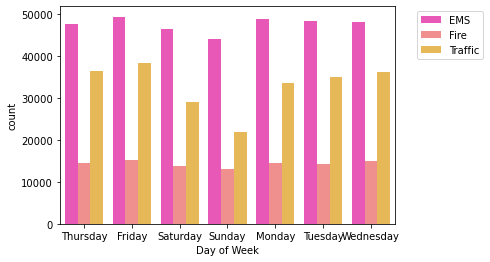

In [30]:
#to create a countplot based of day of week column and hue as Reason column. Spring palette was got online.

sns.countplot(x='Day of Week',data=df,hue='Reason',palette='spring')

#to relocate the legend:

plt.legend(loc=0,bbox_to_anchor=(1.05,1))

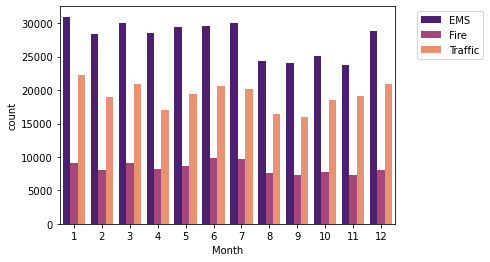

In [31]:
#to create a countplot based of month column and hue as Reason column. Spring palette was got online.

sns.countplot(x='Month',data=df,hue='Reason',palette='magma')

#to relocate the legend:

plt.legend(loc=0,bbox_to_anchor=(1.05,1))

In [33]:
#create a groupby method called byMonth, group the dataFrame by Month column and use the count() for aggregation.

byMonth = df.groupby('Month').count()

In [34]:
byMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027
4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671
5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509,57509
6,60034,60034,60034,52593,60034,60034,60005,60034,60034,60034,60034,60034
7,59832,59832,59832,52507,59832,59832,59802,59832,59832,59832,59832,59832
8,48359,48359,48359,42311,48359,48359,48335,48359,48359,48359,48359,48359
9,47213,47213,47213,41289,47213,47213,47196,47213,47213,47213,47213,47213


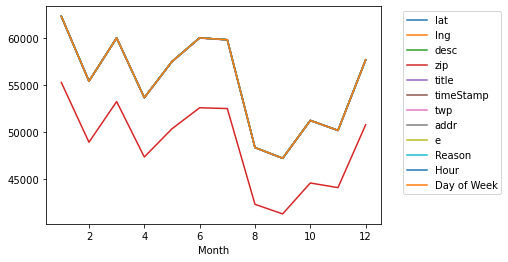

In [38]:
#create a simple plot of byMonth dataframe indicating number of calls: byMonth['any column'].plot() or code below

byMonth.plot()

#adding legend

plt.legend(loc=0,bbox_to_anchor=(1.05,1))

In [45]:
#reset index to make month row a column.

byMonth.reset_index()

,Month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
0,1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336
1,2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427
2,3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027
3,4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671
4,5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509,57509
5,6,60034,60034,60034,52593,60034,60034,60005,60034,60034,60034,60034,60034
6,7,59832,59832,59832,52507,59832,59832,59802,59832,59832,59832,59832,59832
7,8,48359,48359,48359,42311,48359,48359,48335,48359,48359,48359,48359,48359
8,9,47213,47213,47213,41289,47213,47213,47196,47213,47213,47213,47213,47213
9,10,51240,51240,51240,44582,51240,51240,51220,51240,51240,51240,51240,51240


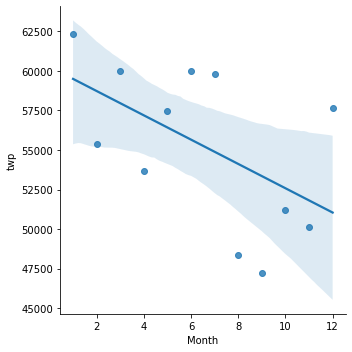

In [51]:
#use seaborn to to create lmplot() for the number of calls per month. use any columns for y

sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

In [54]:
date = df['timeStamp'].iloc[0]

In [55]:
date

Timestamp('2015-12-10 17:10:52')

In [59]:
date.date()

datetime.date(2015, 12, 10)

In [60]:
#create a column called Date from timestamp column by using apply method:

df['Date'] = df['timeStamp'].apply(lambda date : date.date())

In [61]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thursday,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thursday,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thursday,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thursday,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thursday,2015-12-10


In [79]:
#groupby the date column with count aggregate and create plot of counts of 911 calls

date_of_calls = df.groupby('Date').count()

In [80]:
date_of_calls

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
Date,,,,,,,,,,,,,
2015-12-10,114,114,114,100,114,114,114,114,114,114,114,114,114
2015-12-11,391,391,391,332,391,391,391,391,391,391,391,391,391
2015-12-12,402,402,402,334,402,402,402,402,402,402,402,402,402
2015-12-13,316,316,316,279,316,316,316,316,316,316,316,316,316
2015-12-14,444,444,444,386,444,444,443,444,444,444,444,444,444
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-25,318,318,318,271,318,318,318,318,318,318,318,318,318
2020-07-26,296,296,296,271,296,296,296,296,296,296,296,296,296
2020-07-27,329,329,329,288,329,329,329,329,329,329,329,329,329


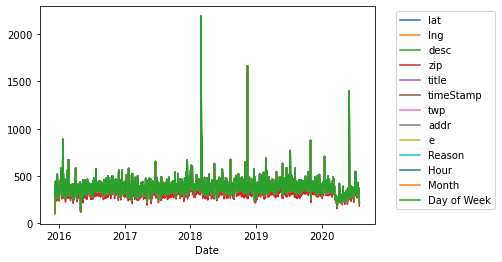

In [81]:
#plot of count of calls

date_of_calls.reset_index().plot(x="Date")

#set the legend outside 

plt.legend(loc=0,bbox_to_anchor=(1.05,1))

<AxesSubplot:xlabel='Date'>

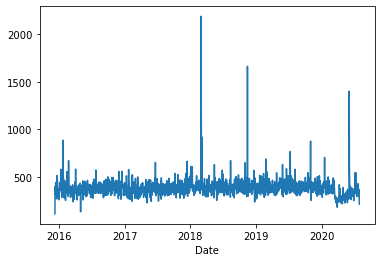

In [82]:
#ploting just the latitude column. you can plot any column of choice
date_of_calls['lat'].plot()

In [91]:
df['Reason'].unique()

array(['EMS', 'Fire', 'Traffic'], dtype=object)

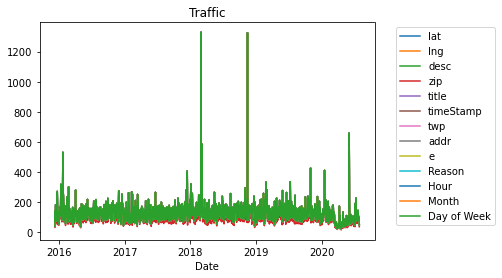

In [93]:
#traffic plot in relation to the groupby Date

df[df['Reason'] == 'Traffic'].groupby('Date').count().plot()
plt.title('Traffic')
plt.legend(loc=0,bbox_to_anchor=(1.05,1))

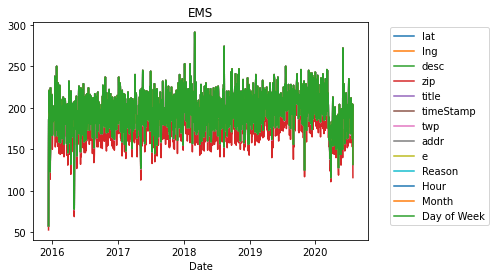

In [95]:
#EMS plot in relation to the aggregate count of groupby Date

df[df['Reason'] == 'EMS'].groupby('Date').count().plot()
plt.title('EMS')
plt.legend(loc=0,bbox_to_anchor=(1.05,1))

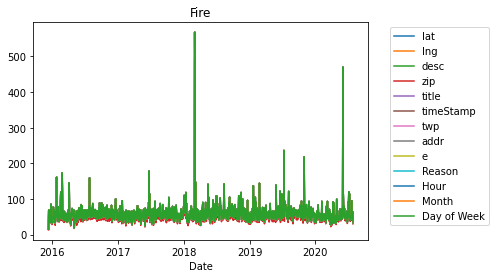

In [96]:
#Fire plot in relation to the aggregate count of groupby Date

df[df['Reason'] == 'Fire'].groupby('Date').count().plot()
plt.title('Fire')
plt.legend(loc=0,bbox_to_anchor=(1.05,1))

In [171]:
#create heatmaps of the dataframe with seaborn. set columns=Hour and index=Day of Week
#conver the data into matrix form with code below

df.pivot_table(columns='Hour',index='Day of Week',values=['Month','Date'])

Month                                                    \
Hour               0         1         2         3         4         5    
Day of Week                                                               
Friday       6.691881  6.448318  6.287785  6.467593  6.206871  6.620500   
Monday       6.110348  6.323997  6.158626  6.364780  6.201347  6.264100   
Saturday     6.361259  6.350170  6.586298  6.189698  6.226051  6.251266   
Sunday       6.449257  6.251054  6.341727  6.490706  6.097893  6.375000   
Thursday     6.332756  6.567472  6.206171  6.207929  6.266821  6.196056   
Tuesday      6.311047  6.344071  6.421331  6.214345  6.272654  6.516370   
Wednesday    6.170673  6.424528  6.223193  6.332806  6.276596  6.261032   

                                                     ...                      \
Hour               6         7         8         9   ...        14        15   
Day of Week                                          ...                       
Friday       6.239326  6.315231  6.210642  6.286309  ...  6.245386  6.336506   
Monday       6.238505  6.289391  6.314680  6.306080  ...  6.266235  6.298140   
Saturday     6.188830  6.253917  6.330055  6.391194  ...  6.451393  6.412083   
Sunday       6.148320  6.190199  6.215595  6.226395  ...  6.368465  6.382570   
Thursday     6.116832  6.279558  6.299604  6.150407  ...  6.487416  6.395195   
Tuesday      6.185704  6.312768  6.263756  6.397054  ...  6.386433  6.353327   
Wednesday    6.312219  6.192722  6.114098  6.309515  ...  6.199703  6.287617   

                                                                         \
Hour               16        17        18        19        20        21   
Day of Week                                                               
Friday       6.339561  6.446647  6.377029  6.334059  6.322743  6.291081   
Monday       6.413646  6.506710  6.438890  6.352050  6.437353  6.411186   
Saturday     6.347150  6.417226  6.352410  6.366295  6.269687  6.392555   
Sunday       6.399561  6.401998  6.443208  6.340750  6.349520  6.383107   
Thursday     6.357647  6.510022  6.537554  6.425260  6.388875  6.323209   
Tuesday      6.279138  6.443266  6.285359  6.221164  6.235371  6.250513   
Wednesday    6.362639  6.488955  6.302407  6.316901  6.179786  6.136556   

                                 
Hour               22        23  
Day of Week                      
Friday       6.231736  6.407551  
Monday       6.388638  6.333494  
Saturday     6.408246  6.461383  
Sunday       6.251807  6.169178  
Thursday     6.467651  6.522515  
Tuesday      6.239291  6.295274  
Wednesday    6.298655  6.379701  

[7 rows x 24 columns]

<AxesSubplot:xlabel='None-Hour', ylabel='Day of Week'>

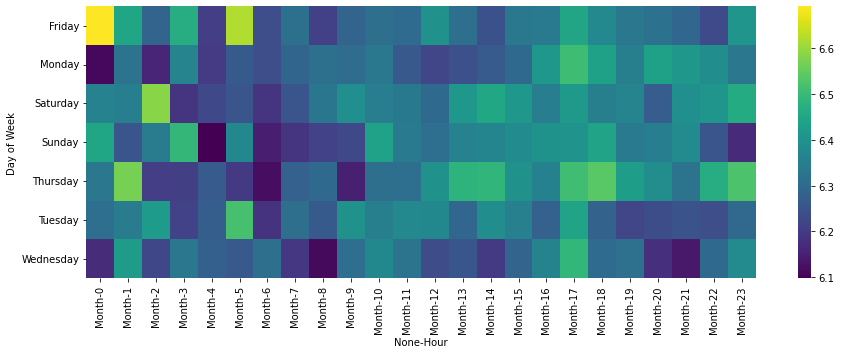

In [172]:
#heatmap of the above data
plt.figure(figsize=(15,5))
sns.heatmap(df.pivot_table(columns='Hour',index='Day of Week',values=['Month','Date']),cmap='viridis')

<Figure size 720x360 with 0 Axes>

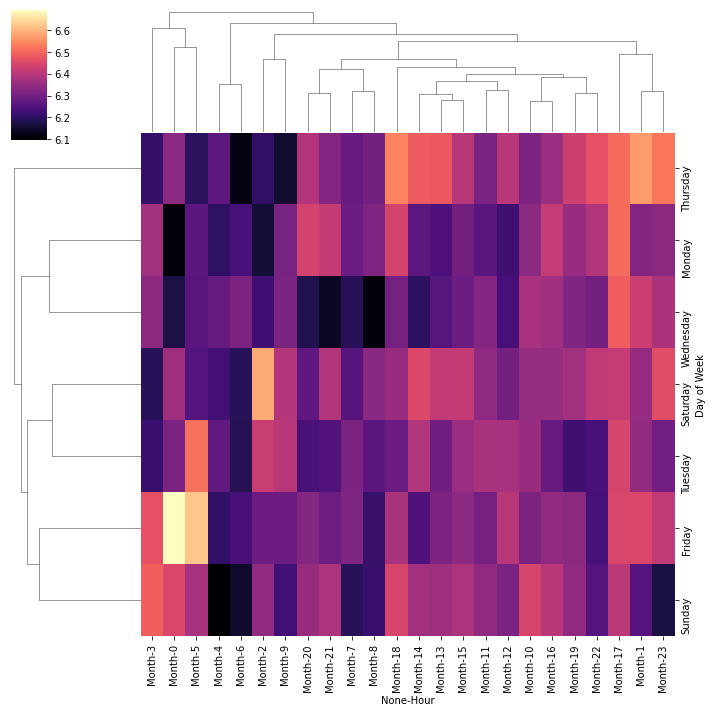

In [177]:
plt.figure(figsize=(10,5))
sns.clustermap(df.pivot_table(columns='Hour',index='Day of Week',values=['Month','Date']),cmap='magma')

In [178]:
#using groupby and unstack method for the matrix and heatmap with a specific column Reason

day_hour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()

In [179]:
day_hour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Friday,1983,1635,1449,1296,1339,1639,2670,4143,5018,5288,...,6394,7040,7065,7113,5668,5056,4375,3913,3422,2834
Monday,1894,1571,1368,1272,1336,1844,2675,4430,5504,5724,...,5713,6289,6346,6408,5441,4488,3823,3254,2658,2072
Saturday,2447,2059,1883,1592,1451,1580,1880,2489,3457,4315,...,5421,5181,5211,5213,4980,4753,4127,3895,3226,2965
Sunday,2424,2135,1946,1614,1471,1488,1726,2408,3001,3728,...,4744,4475,4560,4505,4402,4135,3748,3161,2629,2323
Thursday,1731,1408,1426,1236,1293,1775,2816,4432,5297,5412,...,6079,6493,6375,6935,5512,4703,4045,3490,2844,2354
Tuesday,1720,1459,1322,1213,1247,1741,2784,4425,5634,5566,...,5926,6252,6495,6883,5628,4621,3845,3409,2708,2137
Wednesday,1664,1484,1259,1265,1128,1609,2668,4644,5469,5444,...,6069,6533,6745,7062,5691,4686,4116,3537,2826,2207


<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

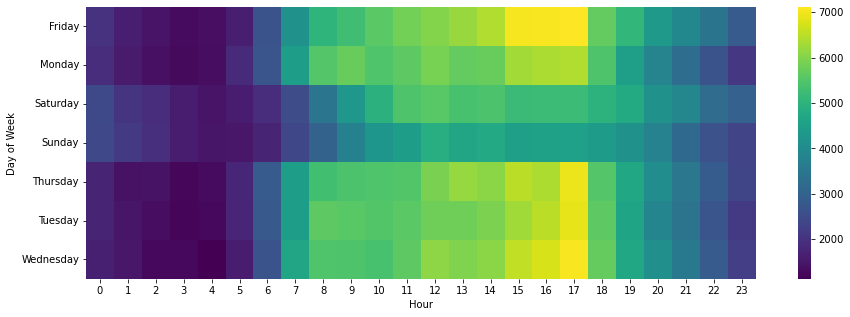

In [180]:
plt.figure(figsize=(15,5))

sns.heatmap(day_hour,cmap='viridis')

<Figure size 720x360 with 0 Axes>

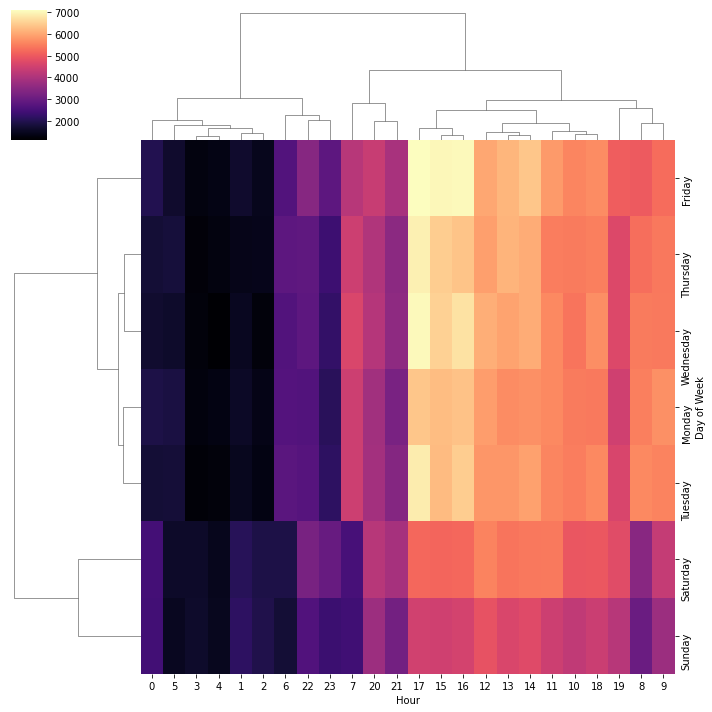

In [181]:
#create a cluster map 

plt.figure(figsize=(10,5))
sns.clustermap(day_hour,cmap='magma')

In [182]:
#repeat matrix above for a dataframe that shows month as column
day_month = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()

In [183]:
day_month

Month,1,2,3,4,5,6,7,8,9,10,11,12
Day of Week,,,,,,,,,,,,
Friday,9309,8255,10941,7997,8904,9207,8681,7336,7694,6934,8379,9305
Monday,8896,8747,8060,8410,7881,8511,9499,6854,6598,8075,6722,8492
Saturday,8475,7593,8050,7514,7223,8198,7748,6111,6566,6609,6773,8592
Sunday,7478,6452,6766,6865,6694,6837,7859,5275,5956,6316,5196,7165
Thursday,9055,7997,8849,7722,8740,9489,8378,7508,6954,7482,8358,8151
Tuesday,9714,8087,8372,7561,9026,8349,9086,7291,6601,7948,7344,8305
Wednesday,9409,8296,8989,7602,9041,9443,8581,7984,6844,7876,7410,7682


<AxesSubplot:xlabel='Month', ylabel='Day of Week'>

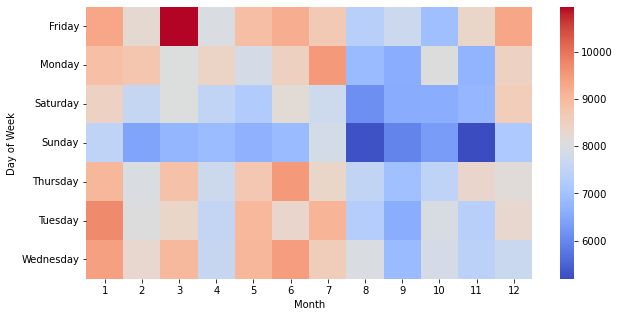

In [184]:
#create heatmap for data_month
plt.figure(figsize=(10,5))
sns.heatmap(day_month,cmap='coolwarm')

<Figure size 720x360 with 0 Axes>

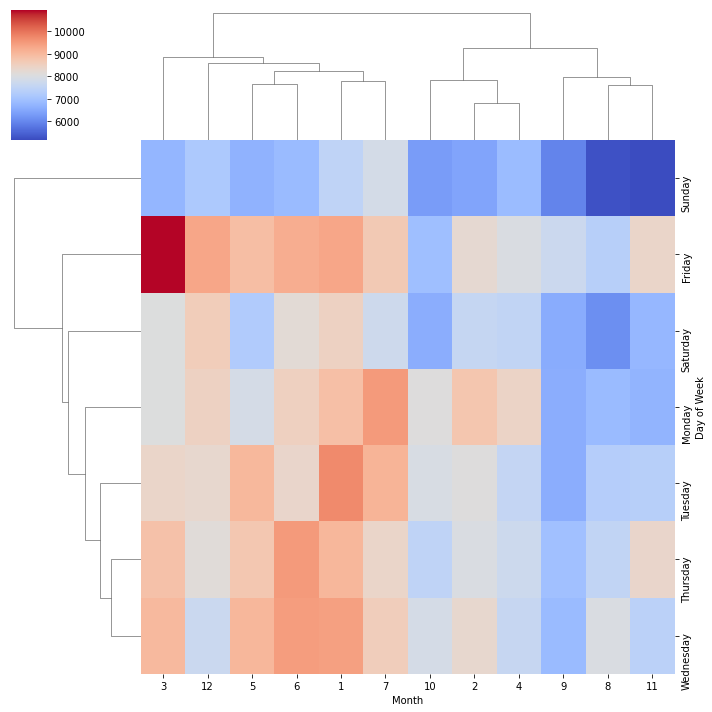

In [185]:
#create a cluster for day_month data
plt.figure(figsize=(10,5))
sns.clustermap(day_month,cmap='coolwarm')

In [186]:
df.pivot_table(columns='Month',index='Day of Week',values=['Hour'])

Hour                                                         \
Month               1          2          3          4          5          6    
Day of Week                                                                     
Friday       13.024707  13.192853  13.581482  13.320120  13.265836  13.379059   
Monday       12.861398  12.505659  12.662283  12.779667  12.938206  12.927153   
Saturday     13.028201  13.217832  12.766460  13.251397  13.038073  13.373750   
Sunday       12.350629  12.977526  13.155927  12.631755  12.915596  13.118034   
Thursday     12.837327  12.725897  12.922590  13.273893  13.051144  12.845611   
Tuesday      12.987029  12.803017  13.009197  13.030419  13.132617  13.132591   
Wednesday    12.683813  13.362705  12.952831  13.076690  13.303174  13.457482   

                                                                               
Month               7          8          9          10         11         12  
Day of Week                                                                    
Friday       13.137427  13.296074  13.086951  13.377127  12.941162  13.367974  
Monday       13.258764  12.835570  12.787208  12.800495  13.014281  13.011540  
Saturday     13.322148  12.973000  13.113006  13.221516  13.035435  13.189013  
Sunday       12.990202  12.829005  12.783076  12.972768  12.591609  12.806560  
Thursday     13.518262  13.065663  13.150417  13.058407  13.264298  13.099620  
Tuesday      13.107858  13.106021  13.015604  12.883996  12.941721  12.786635  
Wednesday    13.145205  13.054359  12.957481  13.054469  13.163833  13.054673

<AxesSubplot:xlabel='None-Month', ylabel='Day of Week'>

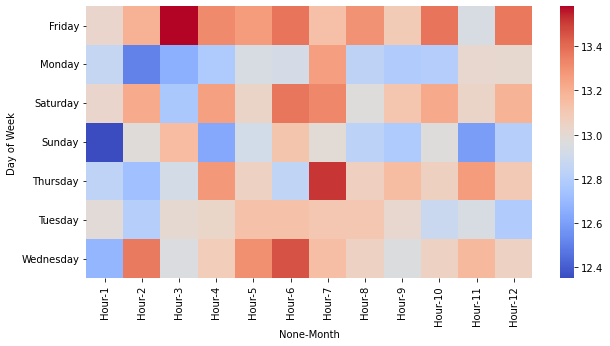

In [188]:
plt.figure(figsize=(10,5))
sns.heatmap(df.pivot_table(columns='Month',index='Day of Week',values=['Hour']),cmap='coolwarm')

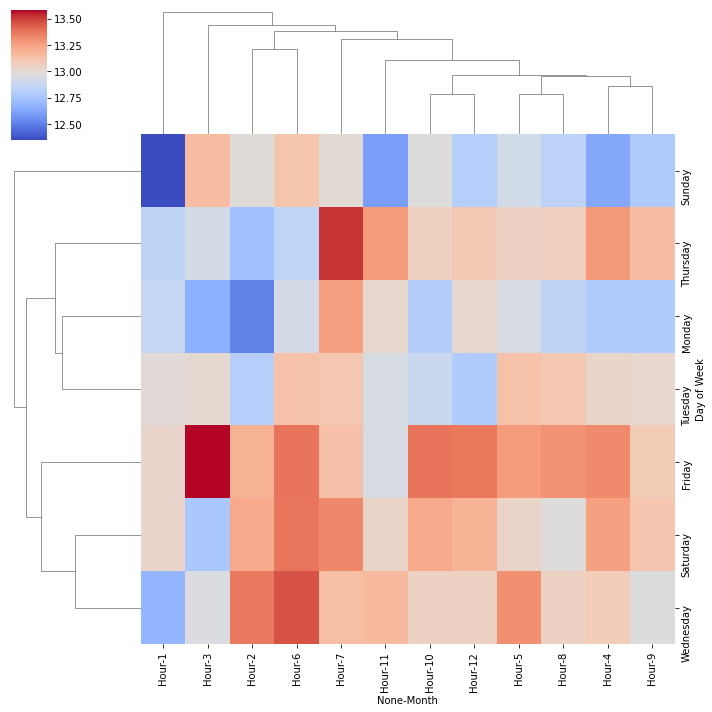

In [189]:
sns.clustermap(df.pivot_table(columns='Month',index='Day of Week',values=['Hour']),cmap='coolwarm')